In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from scipy.sparse import lil_matrix

## Original Laplacian

In [11]:
def laplacian(Ng):
    dh = 1.0
    '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
    e=np.ones(Ng**2)
    e2=([1]*(Ng-1)+[0])*Ng
    e3=([0]+[1]*(Ng-1))*Ng
    h=dh
    A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-Ng,Ng],Ng**2,Ng**2)
    A/=h**2
    return A

laplacian(Ng=3).toarray()

array([[-4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -4.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1., -4.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -4.]])

## New Laplacian

In [16]:
def laplacian(n):
    # Total number of grid points
    total_points = n * n
    matrix_laplacian = lil_matrix((total_points, total_points))
    
    # Fill the matrix based on finite difference method for Laplacian
    for i in range(n):
        for j in range(n):
            row = i * n + j  # Current grid point
            # Diagonal element
            matrix_laplacian[row, row] = 4
            # Check and update neighbors (left, right, up, down)
            if i > 0:
                matrix_laplacian[row, (i - 1) * n + j] = -1  # Up
            if i < n - 1:
                matrix_laplacian[row, (i + 1) * n + j] = -1  # Down
            if j > 0:
                matrix_laplacian[row, i * n + (j - 1)] = -1  # Left
            if j < n - 1:
                matrix_laplacian[row, i * n + (j + 1)] = -1  # Right
    
    # Convert to CSR format for efficient arithmetic operations
    
    matrix_laplacian = matrix_laplacian.tocsr()
    matrix_laplacian = -matrix_laplacian
    h=1.
    matrix_laplacian/=h**2
    return matrix_laplacian

laplacian(n=3).toarray()

array([[-4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -4.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1., -4.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -4.]])

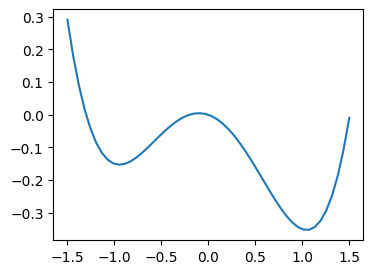

In [24]:
a, b = -1, 1
pot_func = lambda x: (a/2) * pow(x,2) + (b/4) * pow(x,4) - 0.1 * x
listx = np.linspace(-1.5, 1.5, num=50)
list_pot = [pot_func(x) for x in listx]

plt.figure(figsize=(4, 3))
plt.plot(listx, list_pot)
plt.show()